In [7]:
from multiprocessing import Pool

import os
import PIL.Image
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid', rc={"axes.spines.bottom": True, "axes.spines.left": True})
sns.set_palette('Paired')

import matplotlib.pyplot as plt
import plotly.express as px

import torch
from torchvision import transforms as transforms

## Image Transformations

In [6]:
df = pd.read_csv('../data/split.csv')
df.sample(3)

,image,type,subtype,concatenated_type,set
1848,100167000.png,Andere,-,Andere / -,test
824,100179700.png,Vollguss,Handgriff geschlossen,Vollguss / Handgriff geschlossen,test
1678,100032400.png,Vollguss,Pickelloch geschlossen,Vollguss / Pickelloch geschlossen,train


In [334]:
class RandomAugmentor(object):
    """
    This class implements random transformation functions from torchvision.
    """
    
    augmentations = {
        'gray': transforms.Grayscale(num_output_channels=1),
        'jit': transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),
        'fliph': transforms.RandomHorizontalFlip(p=1),
        'flipv': transforms.RandomVerticalFlip(p=1),
        'pers': transforms.RandomPerspective(distortion_scale=0.5, p=1, fill=0),
        'rot': transforms.RandomRotation(degrees=360),
        'blur': transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5))
    }
    
    def __init__(self, apply_n: int, reuse_transform: bool = False, replace_sample: bool = False):
        """
        Random Chosen transformation for a given image.
        
        Params:
        -------------------
        apply_n: int
            How many transformation in sequence order to apply
        
        replace_sample: int
            random choice param if to sample from same list again.
            
        reuse_transform: bool
            if to reuse the transfrom for subsequent transformations
        
        current_transforms:
            Currently applied transformations-
        """
        self.apply_n = apply_n
        self.replace_sample = replace_sample
        self.reuse_transform = reuse_transform
        self.current_transforms = None
    
    def _get_transformation(self):
        """Returns random Transformations"""
        if not self.reuse_transform or self.current_transforms is None:
            self.current_transforms = np.random.choice(list(RandomAugmentor.augmentations.keys()), 
                                                       size=self.apply_n, 
                                                       replace=self.replace_sample)
        transforms_ = [RandomAugmentor.augmentations[t] for t in self.current_transforms]
        
        return transforms.Compose(transforms_)
    
    def _get_transformation_given_k(self, given_k: list):
        """Returns transformations given K transformation steps."""
        transforms_ = [RandomAugmentor.augmentations[t] for t in given_k]
        
        return transforms.Compose(transforms_)

    
    def random_transform(self, image: PIL.Image):
        """Calls Random Transformations to transforn an image."""
        transform = self._get_transformation()
        image = transform(image)
        
        return image
    
    def get_keys(self):
        """Returns transformation keys"""
        return self.current_transforms
    
    def transform_given_key(image: PIL, given_k):
        """Transforms an image given a key."""
        transform = self._get_transformation_given_k(given_k=given_k)
        image = transform(image)

        return image
        

In [299]:
'_'.join(random_augment.current_transforms)

'gray_flipv'

In [300]:
# Location Params
FROM_FOLDER = '../data/transformed_images'
TO_FOLDER = '../data/prepared_images'

# Transformation Params
IMAGE_SIZE = 500
REDUCE_PIXEL_CROP = 120
RESIZE = 128
RANDOM_APPLY_N = 2
RANDOM_REPLACE = False
RANDOM_REUSE_TRANSFORM = False


base_transforms = transforms.Compose([transforms.CenterCrop(IMAGE_SIZE-REDUCE_PIXEL_CROP),
                                      transforms.Resize(RESIZE)])

random_augmenter = RandomAugmentor(apply_n=RANDOM_APPLY_N, reuse_transform=RANDOM_REUSE_TRANSFORM,
                                   replace_sample=RANDOM_REPLACE) 

In [318]:
random_augmenter_ = RandomAugmentor(apply_n=2, reuse_transform=True,
                                    replace_sample=False)

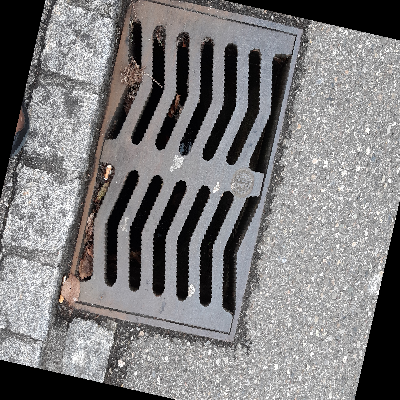

In [333]:
random_augmenter_.random_transform(image)

In [250]:
def _transform_image(image_paths: tuple):
    # load image
    image = PIL.Image.open(image_paths[0])
    
    # apply base transformation
    image = base_transforms(image)
    
    # apply random augmentations
    image = random_augmenter.random_transform(image)
    applied_trans = random_augmenter.get_keys()
    
    print(applied_trans)
    
    return image
    #image.save(image_paths[1] + '_' + '_'.join(applied_trans))

In [96]:
random_id = os.listdir('../data/images_transformed/')[100]

In [97]:
image = PIL.Image.open('../data/images_transformed/'+random_id)

['jit' 'fliph']


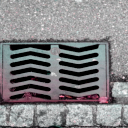

In [231]:
img = _transform_image(('../data/images_transformed/'+random_id, None))
img

In [335]:
import time

In [336]:
time.ctime()

'Tue Mar 22 13:55:05 2022'

In [3]:
foo = 'asfasdasfas.png'.split('.png')

In [4]:
foo

['asfasdasfas', '']